<a href="https://colab.research.google.com/github/acastellanos-ie/NLP-MBD-EN-PT-2022-J-1/blob/main/tagging_parsing_practice/bag_of_words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab Configuration

**Execute this steps to configure the Google Colab environment in order to execute this notebook. It is not required if you are executing it locally and you have properly configured your local environment according to what explained in the Github Repository.**

The first step is to clone the repository to have access to all the data and files

In [ ]:
repository_name = "NLP-MBD-EN-PT-2022-J-1"
repository_url = 'https://github.com/acastellanos-ie/' + repository_name

In [ ]:
! git clone $repository_url

Cloning into 'MBD-EN-BL-ENE-2020-J-1'...
remote: Enumerating objects: 4481, done.
remote: Counting objects: 100% (4481/4481), done.
remote: Compressing objects: 100% (4368/4368), done.
remote: Total 4481 (delta 158), reused 4387 (delta 94), pack-reused 0
Receiving objects: 100% (4481/4481), 13.41 MiB | 19.53 MiB/s, done.
Resolving deltas: 100% (158/158), done.


Install the requirements

In [3]:
! pip install -Uqqr $repository_name/requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement requirements.txt (from versions: none)
ERROR: No matching distribution found for requirements.txt


HINT: You are attempting to install a package literally named "requirements.txt" (which cannot exist). Consider using the '-r' flag to install the packages listed in requirements.txt


Now you have everything you need to execute the code in Colab

# Bag-of-words

In [1]:
import nltk
nltk.download('shakespeare')
nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import numpy as np

[nltk_data] Downloading package shakespeare to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package shakespeare is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The `nltk` library includes several corpus for experimentation. In this markdown we are going to make use of the corpus including the set of Shakespeare's plays.

In the following cell, I will load the corpus and create a dataframe with the name of the book and the textual content.

In [2]:
shakespeare_df = pd.DataFrame(columns=["book", "words"])
for ii, book in enumerate(nltk.corpus.shakespeare.fileids()):
    shakespeare_df.loc[ii] = (book, " ".join(nltk.corpus.shakespeare.words(book)))
print(shakespeare_df)

           book                                              words
0   a_and_c.xml  The Tragedy of Antony and Cleopatra Dramatis P...
1     dream.xml  A Midsummer Night ' s Dream Dramatis Personae ...
2    hamlet.xml  The Tragedy of Hamlet , Prince of Denmark Dram...
3  j_caesar.xml  The Tragedy of Julius Caesar Dramatis Personae...
4   macbeth.xml  The Tragedy of Macbeth Dramatis Personae DUNCA...
5  merchant.xml  The Merchant of Venice Dramatis Personae The D...
6   othello.xml  The Tragedy of Othello , the Moor of Venice Dr...
7   r_and_j.xml  The Tragedy of Romeo and Juliet Text placed in...


While this representation can be useful for humans, it is of no use if you want to use these data for an NLP system.

As we discussed in class, we need to create the document-term matrix which will be the input for any NLP system we need to create on top of it. In the document term matrix we have a row for each one of the different documents (the Shakespeare's plays) and a column for each one of the words in the dataset. At each cell, you will find the weight of the word in the document (for example, how many times does the word appear in the document).

In class we presented several weighting approaches, let's see how we can create them.

Let's start with the simplest one: The Binary weighting. Binary weighting only defines if a word appears (1) or does not appear (0) in a document

In [3]:
binary_weighting = CountVectorizer(binary=True)
binary_shakespeare = binary_weighting.fit_transform(shakespeare_df.words)
binary_dt_matrix = pd.DataFrame(binary_shakespeare.A, columns=binary_weighting.get_feature_names_out())
print(binary_dt_matrix)

   1992  1996  1998  1999  abandon  abate  abatements  abbey  abhor  abhorred  \
0     0     0     0     0        0      0           0      0      0         0   
1     0     0     0     0        0      1           0      0      0         0   
2     0     0     0     0        0      1           1      0      0         1   
3     0     0     0     0        0      0           0      0      0         0   
4     0     0     0     0        0      0           0      0      0         1   
5     0     0     0     0        0      1           0      0      0         0   
6     0     0     0     0        1      0           0      0      1         0   
7     1     1     1     1        0      1           0      1      0         1   

   ...  your  yours  yourself  yourselves  youth  youthful  youths  zeal  \
0  ...     1      1         1           1      1         0       0     0   
1  ...     1      1         1           1      1         0       0     0   
2  ...     1      1         1           1 

## Binary Weighting

Let's inspect the most and least important terms related to the document 6 (Othello)


Watch out with deprecated function get_feature_names is now get_feature_names_out


In [4]:
document = 2
print("25 most important terms for document", shakespeare_df.iloc[document]['book'])
print(binary_dt_matrix.iloc[:, np.argsort(binary_dt_matrix.loc[document])[::-1]].iloc[document][:25])

print("25 least important terms for document", shakespeare_df.iloc[document]['book'])
print(binary_dt_matrix.iloc[:, np.argsort(binary_dt_matrix.loc[document])[::-1]].iloc[document][-25:])



25 most important terms for document hamlet.xml
glean            1
labourer         1
labour           1
eyelids          1
eyes             1
la               1
reechy           1
knows            1
known            1
knowledge        1
consonancy       1
reels            1
knowing          1
knowest          1
considered       1
know             1
reform           1
rede             1
red              1
refrain          1
constant         1
consummation     1
extremity        1
reconcilement    1
eyases           1
Name: 2, dtype: int64
25 least important terms for document hamlet.xml
nnights           0
nobleman          0
noblemen          0
nobleness         0
nobles            0
nobly             0
nobody            0
nod               0
nodded            0
nodding           0
nointed           0
noises            0
nole              0
nominated         0
nonpareil         0
nonsuits          0
nook              0
noon              0
noontide          0
northern          0
northu

As you can see, the representation is not very useful as it is. By only telling us if a word appears or not in a document is not giving us a lot of information. **Can you think on a situation where this binary weighting can be sufficient?**

The next thing to know will be whether the word appears only once or several times.

By knowing wether a word appears or not, we can create a dictionary with those words corresponding to categories. This would help categorize a text in a broad category

## Normal Weighting

In [5]:
tf_weighting = CountVectorizer()
tf_shakespeare = tf_weighting.fit_transform(shakespeare_df.words)
tf_dt_matrix = pd.DataFrame(tf_shakespeare.A, columns=tf_weighting.get_feature_names_out())
print(tf_dt_matrix)

   1992  1996  1998  1999  abandon  abate  abatements  abbey  abhor  abhorred  \
0     0     0     0     0        0      0           0      0      0         0   
1     0     0     0     0        0      1           0      0      0         0   
2     0     0     0     0        0      1           1      0      0         1   
3     0     0     0     0        0      0           0      0      0         0   
4     0     0     0     0        0      0           0      0      0         1   
5     0     0     0     0        0      1           0      0      0         0   
6     0     0     0     0        1      0           0      0      3         0   
7     1     1     1     1        0      1           0      1      0         1   

   ...  your  yours  yourself  yourselves  youth  youthful  youths  zeal  \
0  ...   140     11        15           1      5         0       0     0   
1  ...   123      4         3           3      7         0       0     0   
2  ...   242      6        15           1 

Ok, now we have the words weighted according to how many times they appear in the document. 

Let's check now the most and least important words in Othello

In [6]:
document = 2
print("25 most important terms for document", shakespeare_df.iloc[document]['book'])
print(tf_dt_matrix.iloc[:, np.argsort(tf_dt_matrix.loc[document])[::-1]].iloc[document][:25])

print("25 least important terms for document", shakespeare_df.iloc[document]['book'])
print(tf_dt_matrix.iloc[:, np.argsort(tf_dt_matrix.loc[document])[::-1]].iloc[document][-25:])

25 most important terms for document hamlet.xml
the       1148
and        968
to         771
of         672
you        548
my         506
hamlet     472
in         450
it         417
that       405
is         354
not        315
lord       307
his        298
this       296
but        271
with       268
for        251
your       242
me         235
he         230
as         229
be         227
what       215
king       205
Name: 2, dtype: int64
25 least important terms for document hamlet.xml
nnights           0
nobleman          0
noblemen          0
nobleness         0
nobles            0
nobly             0
nobody            0
nod               0
nodded            0
nodding           0
nointed           0
noises            0
nole              0
nominated         0
nonpareil         0
nonsuits          0
nook              0
noon              0
noontide          0
northern          0
northumberland    0
northward         0
norways           0
norweyan          0
1992              0
Name: 

**What problem do you see with the most important words? Are they really representative?**

No, these are just pronouns, auxiliary verbs and common separators



## TF-IDF weighting

Let's check now how to create the TF-IDF weighting to see if we can improve this representation

In [7]:
tf_idf_weighting = TfidfVectorizer()
tf_idf_shakespeare = tf_idf_weighting.fit_transform(shakespeare_df.words)
tf_idf_dt_matrix = pd.DataFrame(tf_idf_shakespeare.A, columns=tf_idf_weighting.get_feature_names_out())
print(tf_idf_dt_matrix)

       1992      1996      1998      1999   abandon     abate  abatements  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.001132    0.000000   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000551    0.000869   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
5  0.000000  0.000000  0.000000  0.000000  0.000000  0.000843    0.000000   
6  0.000000  0.000000  0.000000  0.000000  0.000973  0.000000    0.000000   
7  0.001163  0.001163  0.001163  0.001163  0.000000  0.000738    0.000000   

      abbey     abhor  abhorred  ...      your     yours  yourself  \
0  0.000000  0.000000  0.000000  ...  0.062407  0.004903  0.006686   
1  0.000000  0.000000  0.000000  ...  0.087673  0.002851  0.002138   
2  0.000000  0.000000  0.000628  ...  0.083986  0.002082  0.005206   
3  0.000000  0.000000  0.0

In [8]:
document = 2
print("25 most important terms for document", shakespeare_df.iloc[document]['book'])
print(tf_idf_dt_matrix.iloc[:, np.argsort(tf_idf_dt_matrix.loc[document])[::-1]].iloc[document][:25])

print("25 least important terms for document", shakespeare_df.iloc[document]['book'])
print(tf_idf_dt_matrix.iloc[:, np.argsort(tf_idf_dt_matrix.loc[document])[::-1]].iloc[document][-25:])

25 most important terms for document hamlet.xml
hamlet      0.410188
the         0.398415
and         0.335946
to          0.267577
of          0.233218
you         0.190184
my          0.175608
in          0.156173
it          0.144720
that        0.140556
horatio     0.137309
is          0.122856
not         0.109321
polonius    0.106892
lord        0.106545
his         0.103421
this        0.102727
but         0.094051
with        0.093010
laertes     0.092119
claudius    0.088127
for         0.087110
your        0.083986
gertrude    0.082559
me          0.081557
Name: 2, dtype: float64
25 least important terms for document hamlet.xml
nnights           0.0
nobleman          0.0
noblemen          0.0
nobleness         0.0
nobles            0.0
nobly             0.0
nobody            0.0
nod               0.0
nodded            0.0
nodding           0.0
nointed           0.0
noises            0.0
nole              0.0
nominated         0.0
nonpareil         0.0
nonsuits          0.0
no

**What do you see now in the representation? Have we solved all the problems?** Seems it it expressed in terms of percentage but the root problem continues to be the same as many stopwords are present and add noise

# StopWords

In the previous section we have experimenting some problems related to stopwords, such as `and` or `of`. These words do not carry any meaning and are unlikely to provide any advantage for any subsequent NLP task and, therefore, we are safe to remove them.

Let's see how to do it via NLTK.

Since stopwords are language-dependant, NLTK provides a list for several languages.

In [9]:
from nltk.corpus import stopwords
print("Languages for which NLTK provides an stopword list:", ", ".join(stopwords.fileids()))

Languages for which NLTK provides an stopword list: arabic, azerbaijani, basque, bengali, catalan, chinese, danish, dutch, english, finnish, french, german, greek, hebrew, hinglish, hungarian, indonesian, italian, kazakh, nepali, norwegian, portuguese, romanian, russian, slovene, spanish, swedish, tajik, turkish


We are just interested in the English stopword list

In [10]:
print("Example of 25 English stopwords:", ", ".join(stopwords.words("english")[:25]))

Example of 25 English stopwords: i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers


We can use this list to remove these words from our representation and create the document term matrix without them. Let's check.

In [11]:
sw_free_tf_idf_weighting = TfidfVectorizer(stop_words='english')
sw_free_tf_idf_shakespeare = sw_free_tf_idf_weighting.fit_transform(shakespeare_df.words)
sw_free_tf_idf_dt_matrix = pd.DataFrame(sw_free_tf_idf_shakespeare.A, columns=sw_free_tf_idf_weighting.get_feature_names_out())
print(sw_free_tf_idf_dt_matrix)

       1992      1996      1998      1999   abandon     abate  abatements  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.002333    0.000000   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.001020    0.001609   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
5  0.000000  0.000000  0.000000  0.000000  0.000000  0.001867    0.000000   
6  0.000000  0.000000  0.000000  0.000000  0.001506  0.000000    0.000000   
7  0.001902  0.001902  0.001902  0.001902  0.000000  0.001206    0.000000   

      abbey     abhor  abhorred  ...     young   younger  youngest   younker  \
0  0.000000  0.000000  0.000000  ...  0.002220  0.001340  0.000000  0.000000   
1  0.000000  0.000000  0.000000  ...  0.010286  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.001163  ...  0.010921  0.001163  0.000000

In [12]:
document = 2
print("25 most important terms for document", shakespeare_df.iloc[document]['book'])
print(sw_free_tf_idf_dt_matrix.iloc[:, np.argsort(sw_free_tf_idf_dt_matrix.loc[document])[::-1]].iloc[document][:25])

print("25 least important terms for document", shakespeare_df.iloc[document]['book'])
print(sw_free_tf_idf_dt_matrix.iloc[:, np.argsort(sw_free_tf_idf_dt_matrix.loc[document])[::-1]].iloc[document][-25:])

25 most important terms for document hamlet.xml
hamlet          0.759256
horatio         0.254158
polonius        0.197857
lord            0.197214
laertes         0.170511
claudius        0.163123
gertrude        0.152816
ophelia         0.141556
king            0.131690
rosencrantz     0.123862
guildenstern    0.104559
queen           0.096460
shall           0.073232
good            0.070020
thou            0.068093
come            0.067451
let             0.066809
marcellus       0.063362
thy             0.055888
like            0.054603
osric           0.051475
bernardo        0.049866
know            0.049464
ll              0.048822
clown           0.047939
Name: 2, dtype: float64
25 least important terms for document hamlet.xml
northumberland     0.0
northward          0.0
norways            0.0
norweyan           0.0
nosegays           0.0
noses              0.0
notable            0.0
notably            0.0
notary             0.0
notice             0.0
number             0.0
n

It's much better now, isn't it?

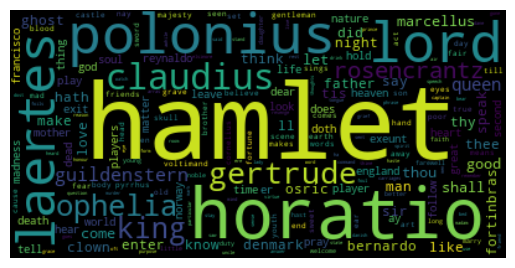

In [14]:
#create a word cloud graph based on the sw_free_tf_idf_dt_matrix.iloc document
from wordcloud import WordCloud
import matplotlib.pyplot as plt

document = 2
wordcloud = WordCloud().generate_from_frequencies(sw_free_tf_idf_dt_matrix.iloc[document])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Try to play with the previous code, change the document to see how the different weightings affect their representation or to use a different corpus from the ones included in NLTK